In [1]:
from IPython.core.display import display, HTML
import pandas as pd

CSS = """
.output {
flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(CSS))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from IPython.display import display
pd.options.display.float_format = '{:,.2f}'.format

In [14]:
import pandas as pd
import numpy as np
from tqdm import tqdm 
from datetime import datetime
import seaborn as sns

sns.set(rc = {'figure.figsize':(25,10)})


from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold


from sklearn.dummy import DummyRegressor
import xgboost as xgb
np.random.seed(0)

import gc
import eli5
import mlflow

import missingno as msno

In [5]:
#df_train = pd.read_hdf("../input/train_warsaw_property.h5")

df_train = pd.read_hdf("../input/big_train_warsaw_property.h5")

df_test = pd.read_hdf("../input/test_warsaw_property.h5")

df = pd.concat([df_train, df_test])
del df_train, df_test
gc.collect()

df.shape

0

(92764, 53)

###  100+ EDA  https://gladson47.medium.com/100-python-pandas-commands-for-eda-tips-tricks-c63a9949bc6b

<AxesSubplot:>

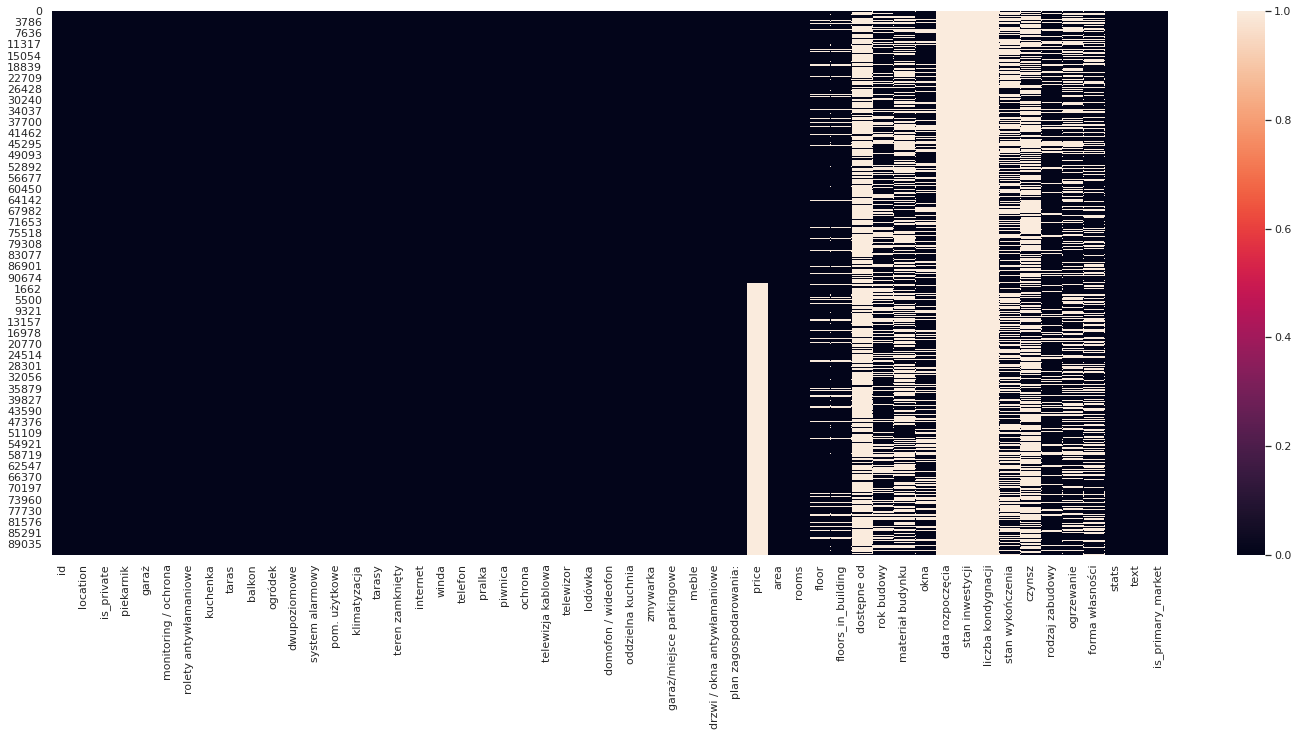

In [15]:
sns.heatmap(df.isnull())

In [16]:
df.isnull().sum(axis = 0)

id                                 0
location                           0
is_private                         0
piekarnik                          0
garaż                              0
monitoring / ochrona               0
rolety antywłamaniowe              0
kuchenka                           0
taras                              0
balkon                             0
ogródek                            0
dwupoziomowe                       0
system alarmowy                    0
pom. użytkowe                      0
klimatyzacja                       0
tarasy                             0
teren zamknięty                    0
internet                           0
winda                              0
telefon                            0
pralka                             0
piwnica                            0
ochrona                            0
telewizja kablowa                  0
telewizor                          0
lodówka                            0
domofon / wideofon                 0
o

In [20]:
df.filter(["id","winda", 'czynsz', 'okna'])

,id,winda,czynsz,okna
0,0,False,NaN,plastikowe
4,4,True,NaN,plastikowe
6,6,False,NaN,plastikowe
7,7,True,NaN,NaN
8,8,True,NaN,NaN
...,...,...,...,...
92751,92751,False,NaN,drewniane
92754,92754,False,240 zł,plastikowe
92756,92756,True,530 zł,plastikowe
92765,92765,False,260 zł,NaN


In [21]:
df.isnull().any()

id                             False
location                       False
is_private                     False
piekarnik                      False
garaż                          False
monitoring / ochrona           False
rolety antywłamaniowe          False
kuchenka                       False
taras                          False
balkon                         False
ogródek                        False
dwupoziomowe                   False
system alarmowy                False
pom. użytkowe                  False
klimatyzacja                   False
tarasy                         False
teren zamknięty                False
internet                       False
winda                          False
telefon                        False
pralka                         False
piwnica                        False
ochrona                        False
telewizja kablowa              False
telewizor                      False
lodówka                        False
domofon / wideofon             False
o

In [22]:
df.isnull().all()

id                             False
location                       False
is_private                     False
piekarnik                      False
garaż                          False
monitoring / ochrona           False
rolety antywłamaniowe          False
kuchenka                       False
taras                          False
balkon                         False
ogródek                        False
dwupoziomowe                   False
system alarmowy                False
pom. użytkowe                  False
klimatyzacja                   False
tarasy                         False
teren zamknięty                False
internet                       False
winda                          False
telefon                        False
pralka                         False
piwnica                        False
ochrona                        False
telewizja kablowa              False
telewizor                      False
lodówka                        False
domofon / wideofon             False
o

In [23]:
df.isna().sum()

id                                 0
location                           0
is_private                         0
piekarnik                          0
garaż                              0
monitoring / ochrona               0
rolety antywłamaniowe              0
kuchenka                           0
taras                              0
balkon                             0
ogródek                            0
dwupoziomowe                       0
system alarmowy                    0
pom. użytkowe                      0
klimatyzacja                       0
tarasy                             0
teren zamknięty                    0
internet                           0
winda                              0
telefon                            0
pralka                             0
piwnica                            0
ochrona                            0
telewizja kablowa                  0
telewizor                          0
lodówka                            0
domofon / wideofon                 0
o

In [25]:
df.notnull()

,id,location,is_private,piekarnik,garaż,monitoring / ochrona,rolety antywłamaniowe,kuchenka,taras,balkon,...,stan inwestycji,liczba kondygnacji,stan wykończenia,czynsz,rodzaj zabudowy,ogrzewanie,forma własności,stats,text,is_primary_market
0,True,True,True,True,True,True,True,True,True,True,...,False,False,True,False,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,True,False,True,True,True
6,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,True,False,True,True,True
7,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,True,True,True
8,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92751,True,True,True,True,True,True,True,True,True,True,...,False,False,True,False,True,True,True,True,True,True
92754,True,True,True,True,True,True,True,True,True,True,...,False,False,True,True,True,True,True,True,True,True
92756,True,True,True,True,True,True,True,True,True,True,...,False,False,False,True,False,True,False,True,True,True
92765,True,True,True,True,True,True,True,True,True,True,...,False,False,True,True,True,True,True,True,True,True


In [27]:
df.dtypes

id                               int64
location                        object
is_private                        int8
piekarnik                         bool
garaż                             bool
monitoring / ochrona              bool
rolety antywłamaniowe             bool
kuchenka                          bool
taras                             bool
balkon                            bool
ogródek                           bool
dwupoziomowe                      bool
system alarmowy                   bool
pom. użytkowe                     bool
klimatyzacja                      bool
tarasy                            bool
teren zamknięty                   bool
internet                          bool
winda                             bool
telefon                           bool
pralka                            bool
piwnica                           bool
ochrona                           bool
telewizja kablowa                 bool
telewizor                         bool
lodówka                  

### features

In [4]:
black_list = ["data rozpoczęcia", "stan inwestycji", "liczba kondygnacji"]
features = [x for x in df.select_dtypes(["number", "boolean", "object"]).columns if x not in black_list]

### bool i numeric

In [5]:
columns_bool = [col for col in df.columns if str(df[col].dtypes) == 'bool']
columns_numeric = [col for col in df.columns if str(df[col].dtypes) == 'int8' or str(df[col].dtypes) =='int64']

### df_new

In [6]:
df_new = df.copy()
df_new[columns_bool] = df[columns_bool].astype(int)

### df_2

In [7]:
df_2  = df[features].copy()
df_2  = df_new[features].copy()

### object columns

In [8]:
columns_object = [x for x in df.select_dtypes("object").columns if x not in black_list]

### location

In [9]:
location_df = df_2["location"].apply(pd.Series)
location_columns = ["wojewodztwo","miasto","dzielnica","ulica","loaction_1"]
location_df.columns = location_columns
location_df.fillna("brak", inplace=True)
location_df.drop("loaction_1", inplace=True, axis=1)
location_df.drop("ulica", inplace=True, axis=1)
df_2 = pd.concat([df_2, location_df], axis=1)
for feat in ["wojewodztwo","miasto","dzielnica"]:
    try:
        df_2["{}_con".format(feat)] = df_2[feat].factorize()[0]
    except:
        print("can not factorize {}".format(feat))

### area 

In [10]:
df_2["area_con"] = df_2["area"].apply(lambda x: float(x.split()[0].replace(",",".")))

### floors_in_building

In [11]:
def floor_num(x):
    if pd.isna(x):
        return -1
    else:
        return int(x.split()[1].replace(')',''))
    
df_2["floors_in_building_con"] = df_2["floors_in_building"].apply(floor_num).map(lambda x: x if x < 1999 else -1)

### floor

In [12]:
floor_list_numbers = ['1', '2', '4', '6', '7', '3', '9', '8', '5', '10'] 

def floor_con(x):
    if x in floor_list_numbers:
        return int(x)
    else:
        if x == 'parter':
            return 0
        elif pd.isna(x):
            return -2
        elif x == 'suterena':
            return -1
        elif x == 'poddasze':
            return -3
        elif x == '> 10':
            return x
        
df_2["floor_con"] = df_2["floor"].map(floor_con)

def calc_floor(x,y):
    if x == "> 10":
        return y
    else:
        return x

df_2["floor_con"] = df_2[["floor_con", "floors_in_building_con"]].apply(lambda x: calc_floor(*x), axis=1)

### floor z floors

In [13]:
def z_floors(x,y):
    return "{} z {}".format(x,y)

df_2["floor_z_floors"] = df_2[ ['floor_con', 'floors_in_building_con'] ].apply(lambda x: z_floors(*x), axis=1)
df_2["floor_z_floors_con"] = df_2["floor_z_floors"].factorize()[0]

### rok budowy

In [14]:
df_2["rok budowy"] = df_2["rok budowy"].fillna('1000')


def zmien_rok(rok):
    if rok == "19999":
        return "1999"
    elif rok == "20118":
        return "2018"
    elif rok == "20019":
        return "2019"
    elif rok == "20016":
        return "2016"
    elif rok == "19991":
        return "1991"
    elif rok == "20011":
        return "2011"
    elif rok == "19020":
        return "1920"
    elif rok == "19667":
        return "1970"
    elif rok == "12990":
        return "1990"
    
    elif rok == "80":
        return "1980"
    elif rok == "1":
        return "2001"
    elif rok == "50":
        return "1950"
    elif rok == "85":
        return "1985"
    elif rok == "200":
        return "2000"
    elif rok == "19":
        return "1919"
    elif rok == "76":
        return "1976"
    elif rok == "215":
        return "2015"
    elif rok == "90":
        return "1990"
    elif rok == "81":
        return "1981"
    elif rok == "90":
        return "1990"
    elif rok == "195":
        return "1995"
    elif rok == "68":
        return "1968"
    elif rok == "4":
        return "2004"
    elif rok == "93":
        return "1993"
    elif rok == "20":
        return "2020"
    elif rok == "84":
        return "1984"
    elif rok == "97":
        return "1997"
    elif rok == "450":
        return "1990"
    elif rok == "83":
        return "1983"
    elif rok == "69":
        return "1969"
    elif rok == "60":
        return "1960"
    elif rok == "90":
        return "1990"
    elif rok == "201":
        return "2017"
    elif rok == "70":
        return "1970"
    elif rok == "12":
        return "2012"
    elif rok == "320":
        return "2020"
    elif rok == "208":
        return "2018"
    elif rok == "75":
        return "1975"
    elif rok == "202":
        return "2002"
    elif rok == "2":
        return "2002"
    
    else:
        return rok
    
df_2["rok_budowy_norm"] = df_2["rok budowy"].map(zmien_rok)
df_2["rok_budowy_con"] = df_2["rok_budowy_norm"].map(lambda x: int(x))
df_2.drop("rok_budowy_norm", inplace=True, axis=1)

### czynsz 

In [15]:
df["rental_con"] = df["czynsz"].map(lambda x: str(x).split("zł")[0].replace(" ", "").replace(",", ".") if str(x) != "nan" else -1 )
df["rental_con"] = df["rental_con"].map(lambda x: float(str(x).replace("eur", "") * 4) if "eur" in str(x) else x).astype("float")

### stats

In [16]:
stats_df = df_2["stats"].apply(pd.Series)
stats_column = stats_df.columns
stats_df['visit_ads_con'] = stats_df['visit_ads'].map(lambda x: float(x))

stats_df['visit_ads_con'].fillna(-1, inplace=True)
df_2 = pd.concat([df_2, stats_df], axis=1)

### forma własności

In [17]:
df_2["forma własności"].fillna("inna_własność", inplace=True)

try:
    df_2["forma_wlasnosci_con"] = df_2["forma własności"].factorize()[0]
except:
    print("can not factorize")
    

### rodzaj zabudowy

In [18]:
df_2["rodzaj zabudowy"].fillna("inne", inplace=True)

try:
    df_2["rodzaj zabudowy_con"] = df_2["rodzaj zabudowy"].factorize()[0]
except:
    print("can not factorize")

### ogrzewanie

In [19]:
df_2["ogrzewanie"].fillna("inne", inplace=True)
try:
    df_2["ogrzewanie_con"] = df_2["ogrzewanie"].factorize()[0]
except:
    print("can not factorize")

### stan wykończenia

In [20]:
df_2["stan wykończenia"].fillna("inne", inplace=True)

try:
    df_2["stan wykończenia_con"] = df_2["stan wykończenia"].factorize()[0]
except:
    print("can not factorize")
    

### okna

In [21]:
df_2["okna"].fillna("inne", inplace=True)
try:
    df_2["okna_con"] = df_2["okna"].factorize()[0]
except:
    print("can not factorize")
    

### materiał budynku

In [22]:
df_2["materiał budynku"].fillna("inne", inplace=True)
try:
    df_2["materiał budynku_con"] = df_2["materiał budynku"].factorize()[0]
except:
    print("can not factorize")

### dostepny od

In [23]:
df_2["dostępne od"].fillna("1 stycznia 2000", inplace=True)

In [24]:
moj_dict = {"stycznia": 1,
            "lutego": 2,
            "marca": 3,
            "kwietnia": 4,
            "maja": 5,
            "czerwca": 6,
            "lipca": 7,
            "sierpnia": 8,
            "września": 9,
            "października": 10,
            "listopada": 11,
            "grudnia": 12
}

def date_ret(x):
    if pd.isna(x):
        return -1
    elif x.split()[1] in list(moj_dict.keys()):
        return (".".join([ str(x.split()[0]) , str(moj_dict[x.split()[1]]) , str(x.split()[2]) ] ))

df_2["dostępne od_norm"] = df_2["dostępne od"].map(date_ret)

def to_year(d):
    data = pd.to_datetime(d)
    return data.to_pydatetime().year

def to_month(d):
    data = pd.to_datetime(d)
    return data.to_pydatetime().month
    
def to_day(d):
    data = pd.to_datetime(d)
    return data.to_pydatetime().day

df_2["dostępne od_year_con"] = df_2["dostępne od_norm"].map(to_year)
df_2["dostępne od_month_con"] = df_2["dostępne od_norm"].map(to_month)
df_2["dostępne od_day_con"] = df_2["dostępne od_norm"].map(to_day)

### centrum

In [25]:
df_2["centrum_con"] = df_2["text"].map(lambda x: 1 if "centrum" in x else 0)
df_2["centrum_con"].value_counts()

0    58746
1    34018
Name: centrum_con, dtype: int64

### winda

In [26]:
df_2["winda_con"] = df_2["text"].map(lambda x: 1 if ('winda' in x) | ('windą' in x) | ('windy' in x) | ('windę' in x) else 0)

### cena mean

In [27]:
df_2["price_mean_con"] = df_2["price"].mean()
df_2["price_median_con"] = df_2["price"].median()

### features

In [28]:
columns_con = [col for col in df_2.columns if "_con" in col ]

In [29]:
columns_numeric

['id', 'is_private', 'rooms']

In [30]:
feats = ['id'] + columns_bool + columns_con + ['is_private', 'rooms'] + ["price"]

In [31]:
feats

['id',
 'piekarnik',
 'garaż',
 'monitoring / ochrona',
 'rolety antywłamaniowe',
 'kuchenka',
 'taras',
 'balkon',
 'ogródek',
 'dwupoziomowe',
 'system alarmowy',
 'pom. użytkowe',
 'klimatyzacja',
 'tarasy',
 'teren zamknięty',
 'internet',
 'winda',
 'telefon',
 'pralka',
 'piwnica',
 'ochrona',
 'telewizja kablowa',
 'telewizor',
 'lodówka',
 'domofon / wideofon',
 'oddzielna kuchnia',
 'zmywarka',
 'garaż/miejsce parkingowe',
 'meble',
 'drzwi / okna antywłamaniowe',
 'plan zagospodarowania:',
 'is_primary_market',
 'wojewodztwo_con',
 'miasto_con',
 'dzielnica_con',
 'area_con',
 'floors_in_building_con',
 'floor_con',
 'floor_z_floors_con',
 'rok_budowy_con',
 'visit_ads_con',
 'forma_wlasnosci_con',
 'rodzaj zabudowy_con',
 'ogrzewanie_con',
 'stan wykończenia_con',
 'okna_con',
 'materiał budynku_con',
 'dostępne od_year_con',
 'dostępne od_month_con',
 'dostępne od_day_con',
 'centrum_con',
 'winda_con',
 'price_mean_con',
 'price_median_con',
 'is_private',
 'rooms',
 'pric

### final df

In [32]:
df_k = df_2[feats].copy()
df_k

,id,piekarnik,garaż,monitoring / ochrona,rolety antywłamaniowe,kuchenka,taras,balkon,ogródek,dwupoziomowe,...,dostępne od_year_con,dostępne od_month_con,dostępne od_day_con,centrum_con,winda_con,price_mean_con,price_median_con,is_private,rooms,price
0,0,0,0,0,0,0,0,0,1,0,...,2019,7,31,0,0,"393,217.69","319,088.00",1,3,"339,000.00"
4,4,0,0,0,0,0,0,1,0,0,...,2000,1,1,0,0,"393,217.69","319,088.00",0,1,"178,160.00"
6,6,0,0,0,0,0,0,1,0,0,...,2000,1,1,0,0,"393,217.69","319,088.00",0,3,"295,335.00"
7,7,0,0,0,0,0,0,1,0,0,...,2000,1,1,1,1,"393,217.69","319,088.00",0,4,"382,311.00"
8,8,0,0,0,0,0,0,1,0,0,...,2000,1,1,1,1,"393,217.69","319,088.00",0,4,"345,717.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92751,92751,0,0,0,0,1,0,0,0,0,...,2000,1,1,1,0,"393,217.69","319,088.00",0,3,nan
92754,92754,0,0,0,0,0,0,1,0,0,...,2000,1,1,0,0,"393,217.69","319,088.00",0,2,nan
92756,92756,0,0,0,0,0,1,0,0,1,...,2000,1,1,0,1,"393,217.69","319,088.00",0,4,nan
92765,92765,0,0,0,0,0,0,1,0,0,...,2000,1,1,0,0,"393,217.69","319,088.00",0,5,nan


In [33]:
df_k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92764 entries, 0 to 92766
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           92764 non-null  int64  
 1   piekarnik                    92764 non-null  int64  
 2   garaż                        92764 non-null  int64  
 3   monitoring / ochrona         92764 non-null  int64  
 4   rolety antywłamaniowe        92764 non-null  int64  
 5   kuchenka                     92764 non-null  int64  
 6   taras                        92764 non-null  int64  
 7   balkon                       92764 non-null  int64  
 8   ogródek                      92764 non-null  int64  
 9   dwupoziomowe                 92764 non-null  int64  
 10  system alarmowy              92764 non-null  int64  
 11  pom. użytkowe                92764 non-null  int64  
 12  klimatyzacja                 92764 non-null  int64  
 13  tarasy          

In [34]:
#import re
#patterns = [str(elem) for i, elem in enumerate(df_2["text"].values) if i < 1000 and ("wind") in elem]
#for pattern in patterns:
#    list_of_digit_data = re.findall(r"(\s?(bez)?\s?[w|W][i|I][n|N][d|D][ami|ę|ą|y|a|e|A|Ę|Y|Ą|E])", pattern)
#    #print(pattern)
#    print((list_of_digit_data))


### corr()

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {'figure.figsize':(25,15)})

In [36]:
print(df_2[columns_con].corr())

                        wojewodztwo_con  miasto_con  dzielnica_con  area_con  \
wojewodztwo_con                    1.00        0.99           0.70      0.00   
miasto_con                         0.99        1.00           0.70      0.00   
dzielnica_con                      0.70        0.70           1.00     -0.01   
area_con                           0.00        0.00          -0.01      1.00   
floors_in_building_con             0.01        0.01          -0.01     -0.05   
floor_con                          0.02        0.01          -0.02     -0.01   
floor_z_floors_con                 0.05        0.04           0.03     -0.04   
rok_budowy_con                    -0.00       -0.01          -0.01      0.04   
visit_ads_con                      0.06        0.06           0.05      0.06   
forma_wlasnosci_con               -0.04       -0.04          -0.02     -0.06   
rodzaj zabudowy_con                0.05        0.05           0.01      0.06   
ogrzewanie_con                    -0.10 

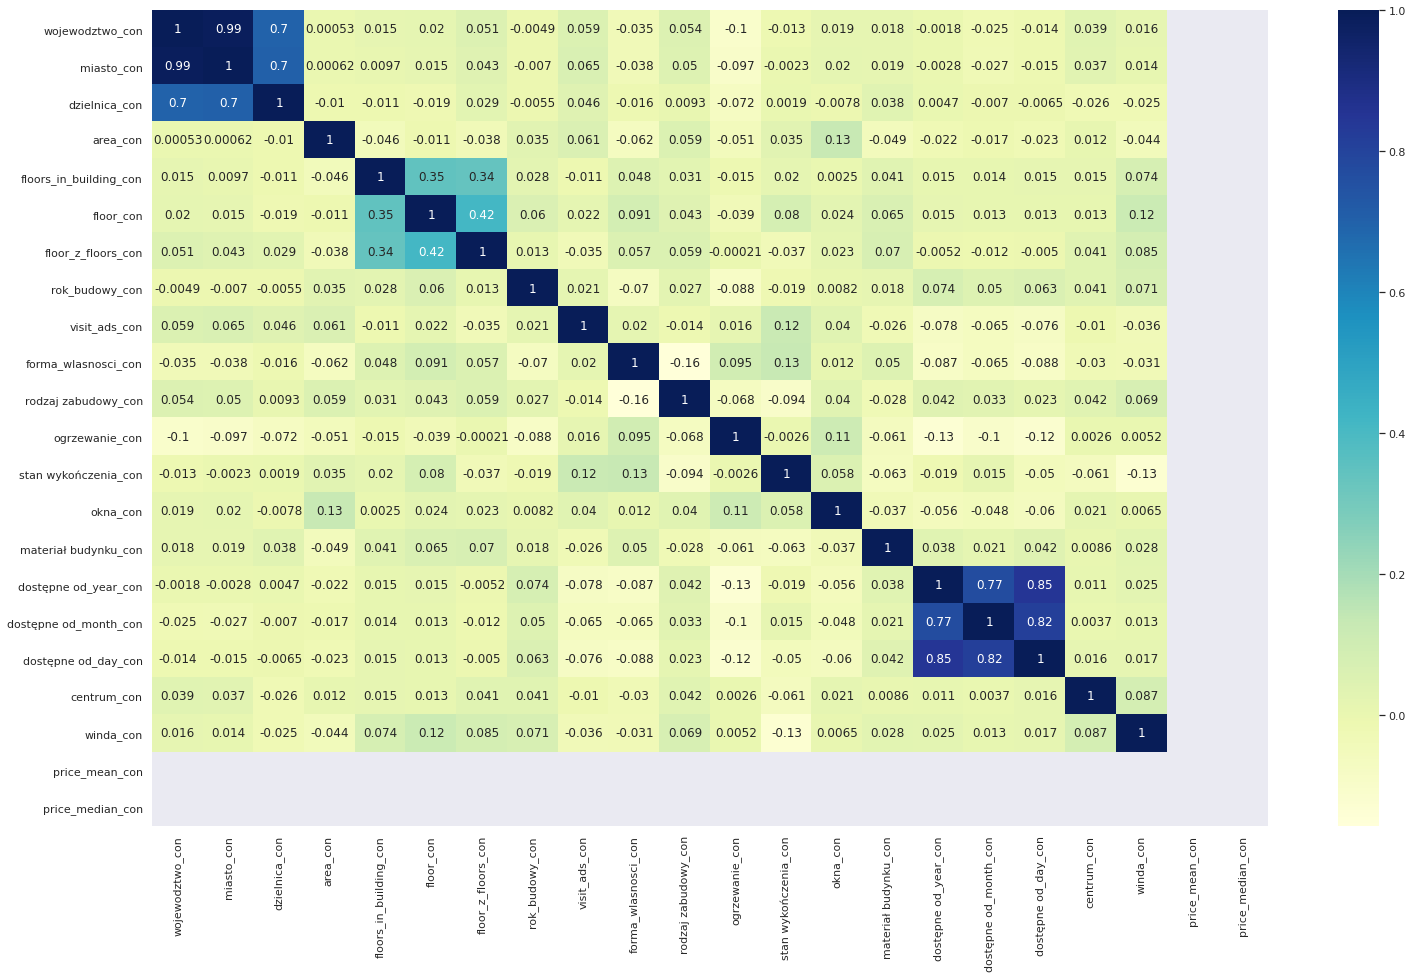

In [48]:
# plotting correlation heatmap
dataplot = sns.heatmap(df_2[columns_con].corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

### check functions

In [38]:
def check_model(df, feats, model, cv=5, scoring="neg_mean_absolute_error"):
    df_train = df[ ~df["price"].isnull() ].copy()
    df_test = df[ df["price"].isnull() ].copy()

    X_train = df_train[feats].values
    y_train = df_train["price"].values
    
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)
    return np.mean(scores), np.std(scores)


def check_log_model(df, feats, model, cv=5, scoring="neg_mean_absolute_error"):
    df_train = df[ ~df["price"].isnull() ].copy()

    X = df_train[feats]
    y = df_train["price"]
    y_log = np.log(y)
    
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    scores = []
    for train_idx, test_idx in cv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_log_train, y_test = y_log.iloc[train_idx], y.iloc[test_idx]

        
        model.fit(X_train, y_log_train)
        y_log_pred = model.predict(X_test)
        y_pred = np.exp(y_log_pred)

        score = mean_absolute_error(y_test, y_pred)
        scores.append(score)

    return np.mean(scores), np.std(scores)

In [39]:
feats = columns_bool + columns_con + ['is_private', 'rooms']

In [40]:
#check_model(df_k, feats, xgb.XGBRegressor(max_depth=7, n_estimators=1000, learning_rate=0.1, random_state=0))

### price & hist()

In [28]:
# https://pub.towardsai.net/matplotlib-histograms-explained-from-scratch-python-6fe3e9d26de3

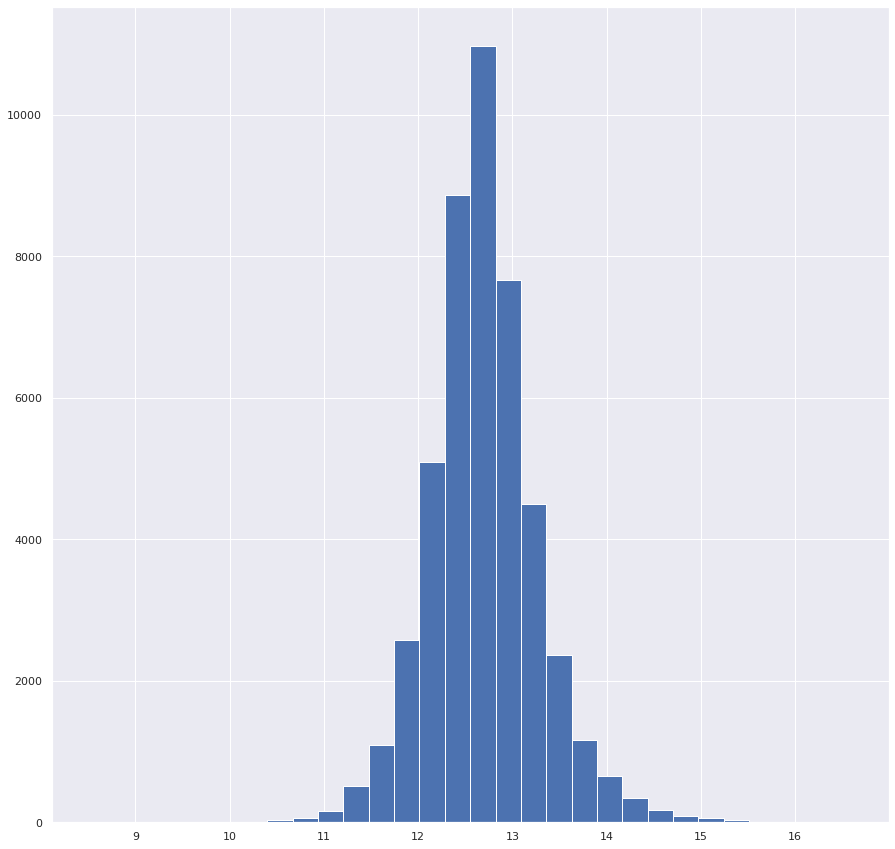

In [41]:
plt.hist(np.log(df_k["price"]), bins=30);

In [42]:
check_log_model(df_k, feats, xgb.XGBRegressor(max_depth=7, n_estimators=1000, learning_rate=0.1, random_state=0))

(54983.3, 2436.9473)

### model

In [43]:
feats = columns_bool + columns_con + ['is_private', 'rooms']

train = df_k[ ~df["price"].isnull() ].copy()
test = df_k[ df["price"].isnull() ].copy()

X_train = train[feats]
y_train = train["price"]
y_log_train = np.log(y_train)

X_test = test[feats]

model = xgb.XGBRegressor(max_depth=7, n_estimators=1000, learning_rate=0.1, random_state=0)
model.fit(X_train, y_log_train)
y_log_pred = model.predict(X_test)
y_pred = np.exp(y_log_pred)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### eli5

In [44]:
eli5.show_weights(model, feature_names=feats, top=30)

Weight,Feature
0.1169,area_con
0.0986,miasto_con
0.0967,winda
0.0544,rodzaj zabudowy_con
0.0541,wojewodztwo_con
0.0491,is_primary_market
0.0401,okna_con
0.0331,stan wykończenia_con
0.0312,rok_budowy_con
0.0293,floors_in_building_con


### kaggle

In [46]:
test["price"] = y_pred
test[ ['id', 'price'] ].to_csv('../output/xgb_starter2_v15_big_final.csv', index=False) 